<img src="https://www.mmu.edu.my/fci/wp-content/uploads/2021/01/FCI_wNEW_MMU_LOGO.png" style="height: 80px;" align=left>  

# Learning Objectives

Towards the end of this lesson, you should be able to:
- handle different types of missing data
- handle noisy data using various techniques
- merge different sets of data into a unified set
- assess relationships of attributes

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns

---

### For Google Colab Use Only
Skip this section if you are using Jupyter Notebook etc.

In [47]:
# from google.colab import drive
# drive.mount('/content/drive')

In [48]:
drive_path = 'C:/Users/user/Downloads/projects/Data Science (Revision Gallery)/Data Mining/lab/Tutorial 3/' #set your google drive path


---
## Dealing with missing values

Recap, when dealing with any dataset, read the data dictionary/description/metadata of your dataset. Missing values are often dealt with as `empty` cells in the data but sometimes, they are filled with dummy values like `?`, `-`, `.`, etc.
If you don't have access to the metadata, look at the descriptive statistics (mean, min, max) or make use of visualizations to try and make sense of the data.

For simple cases, consider this toy data here containing age and gender with missing data represented by `NaN`:

In [49]:
age = pd.Series([18,18,19,20,np.nan,14,np.nan])
gender = pd.Series(['male', 'male', 'female', 'female', 'male', 'female', 'male'])

df = pd.DataFrame({'age':age, 'gender':gender})
display(df)

,age,gender
0,18.0,male
1,18.0,male
2,19.0,female
3,20.0,female
4,NaN,male
5,14.0,female
6,NaN,male


If missing data is "recorded" as `NaN` like in this case, then `Pandas` provide various useful functions to detect, remove, or fill (impute) them: <br>
`df.isna()`: calculates the amount of missing data for each attribute<br>
`df.dropna()`: drop rows of data containing missing data<br>
`df.fillna()`: fill in missing data with set value.

Try the following tasks:

In [50]:
# # Get the number of NAs in df by column
df.isna().sum()
# df.isna()

age       2
gender    0
dtype: int64

In [51]:
# create a copy of df and name it df1, then drop all na.
df1 = df.copy()
df1.dropna()

,age,gender
0,18.0,male
1,18.0,male
2,19.0,female
3,20.0,female
5,14.0,female


In [52]:
from sklearn.preprocessing import LabelEncoder
# create a copy of df and name it df2, then fill NA with median of each feature
df2 = df.copy()
# df2 = pd.get_dummies(df2, columns=['gender'], drop_first=True) -- one hot encoding for multiple values in a variable

# We use label Encoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the "gender" column
df2['gender'] = label_encoder.fit_transform(df2['gender'])
df2.fillna(df2.median(), inplace=True)
df2

,age,gender
0,18.0,1
1,18.0,1
2,19.0,0
3,20.0,0
4,18.0,1
5,14.0,0
6,18.0,1


In [53]:
# create a copy of df and name it df3, then fill NA with median of each feature
# hint: use relevant function to extract the needed statistical measure

df3 = df.copy()
df3['age'].fillna(df3['age'].median(), inplace=True)
df3

,age,gender
0,18.0,male
1,18.0,male
2,19.0,female
3,20.0,female
4,18.0,male
5,14.0,female
6,18.0,male


There are more ways to deal with missing values and for varieties of data such as categorical attributes. <br>
Various imputation methods has been developed to make the "choice" of values to be more reflective of real data (fill with most frequent, MICE, etc.).
Explore more here: https://scikit-learn.org/stable/modules/impute.html

Let's try more advanced methods of imputation using the [Credit Approval dataset retrived from UCI ML repository](https://archive.ics.uci.edu/dataset/27/credit+approval). A copy of the dataset is provided with this tutorial materials.

After understanding the information, proceed with reading the data and identifying the missing values:

In [54]:
try:
  drive_path
except NameError:
  drive_path = ''

data_raw = pd.read_csv(drive_path + 'credit+approval/crx.data',header = None)
data_columns = []
for i in range(16):
  data_columns.append('A' + str(i+1))
data_raw.columns = data_columns
display(data_raw)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [55]:
# find out the representation of missing values used in the dataset
# replace the representation with np.na 

print(data_raw['A1'].unique()) #check column
data_raw = data_raw.replace('?',np.nan) #replace ? to NaN

# check the column with missing values and the amount
data_raw.isna().sum()

['b' 'a' '?']


A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [56]:
#convert column into the appropriate types
#Notes: [????] indicates that it can read categorical 

data_raw['A2'] = pd.to_numeric(data_raw['A2'],errors="coerce")
data_raw.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

### Univariate Imputation
Univariate imputation algorithm imputes values in the i-th attribute using only non-missing values in that attribute itself without considering other attributes in the dataset (no estimation using other attribtues).

The `SimpleImputer` from scikit-learn provides basic strategies for this approach that can be applied to different data types, as long as the missing values are encoded as `np.nan`.

Complete the codes below to perform the simple imputation:

In [57]:
from sklearn.impute import SimpleImputer

# initialize imputer to fill in missing values of categorical/object attribute
# using the most frequently appearing categorical value
cat_impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#select all categorical / object attributes from the dataset
data_cat = data_raw.select_dtypes(include='object')

# fit the imputer with the selected categorical data columns and save the output
# as a dataframe. Remember to name the columns again.
data_cat_clean = pd.DataFrame(cat_impute.fit_transform(data_cat))
data_cat_clean.columns = data_cat.columns

#Check the categorical data for any remaining missing values
display(data_raw[data_cat.columns].isna().sum()) #before imputation
display(data_cat_clean.isna().sum()) #after imputation

A1     12
A4      6
A5      6
A6      9
A7      9
A9      0
A10     0
A12     0
A13     0
A14    13
A16     0
dtype: int64

A1     0
A4     0
A5     0
A6     0
A7     0
A9     0
A10    0
A12    0
A13    0
A14    0
A16    0
dtype: int64

In [58]:
#get index of rows with missing values
data_cat_miss = []
for i in data_cat.columns:
  data_cat_miss.extend(data_cat[data_cat[i].isnull()].index)
data_cat_miss = np.unique(data_cat_miss)
#see imputed values
display(data_cat_clean.iloc[data_cat_miss])

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A14,A16
71,b,u,g,d,bb,t,f,t,g,00000,-
202,b,u,g,c,v,t,t,f,g,00000,+
206,a,u,g,c,v,f,f,f,p,00000,+
243,a,u,g,q,v,t,t,f,g,00000,+
248,b,u,g,c,bb,t,t,f,g,00073,+
270,b,u,g,c,v,f,f,f,p,00000,+
278,b,y,p,ff,ff,f,f,f,g,00000,-
327,b,u,g,i,bb,f,f,f,s,01160,-
330,b,u,g,c,v,f,f,f,p,00000,-
346,b,u,g,c,v,f,f,t,g,00372,-


In [59]:
# fill in NaN values with mean from numerical values

# initialize imputer to fill in missing values of numerical attribute
# using the means of the attributes
num_impute = SimpleImputer(missing_values=np.nan,strategy='mean')

#select the numerical attributes from the dataset with missing values
data_num = data_raw.select_dtypes(include='float64')

# fit the imputer with the selected numerical data columns and save the output
# as a dataframe. Remember to name the columns again.
data_num_clean = pd.DataFrame(num_impute.fit_transform(data_num))
data_num_clean.columns = data_num.columns

#Check the numerical data for any remaining missing values
display(data_num.isna().sum())
display(data_num_clean.isna().sum())

A2    12
A3     0
A8     0
dtype: int64

A2    0
A3    0
A8    0
dtype: int64

In [60]:
#get index of rows with missing values
data_num_miss = data_num[data_num['A2'].isnull()].index.tolist()
#see imputed values
display(data_num_clean.iloc[data_num_miss])

,A2,A3,A8
83,31.568171,3.500,3.000
86,31.568171,0.375,0.875
92,31.568171,5.000,8.500
97,31.568171,0.500,0.835
254,31.568171,0.625,0.250
286,31.568171,1.500,0.000
329,31.568171,4.000,0.085
445,31.568171,11.250,0.000
450,31.568171,3.000,7.000
500,31.568171,4.000,5.000


In [61]:
#create a copy of the dataset and name it data_clean
data_clean = data_raw.copy()
#replace the cleaned categorical and numerical columns into data_clean
data_clean[data_cat_clean.columns] = data_cat_clean
data_clean[data_num_clean.columns] = data_num_clean
data_clean.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

### Multivariate Imputation
Mmultivariate imputation algorithms use the entire set of available attributes to estimate the missing values. Comparing to univariate imputation, this approach would be more sophisticated, providing more reasonable values for imputation. A convenient function provided but Scikit Learn for multivariate imputation is the `IterativeImputer`.

Complete the code below to try out the `IterativeImputer`:

In [62]:
from sklearn.experimental import enable_iterative_imputer #must be included to enable the usage of the imputer
from sklearn.impute import IterativeImputer

# initialize imputer to fill in missing values of numerical attribute
# using the means of the attributes
num_iterimpute = IterativeImputer(random_state=0)

#select the numerical attributes from the dataset with missing values
data_num = data_raw.select_dtypes(include='float64')

# fit the imputer with the selected numerical data columns and save the output
# as a dataframe. Remember to name the columns again.
data_num_clean2 = pd.DataFrame(num_iterimpute.fit_transform(data_num))
data_num_clean2.columns = data_num.columns

#Check the numerical data for any remaining missing values
display(data_num.isna().sum())
display(data_num_clean2.isna().sum())

A2    12
A3     0
A8     0
dtype: int64

A2    0
A3    0
A8    0
dtype: int64

In [63]:
#get index of rows with missing values
data_num_miss = data_num[data_num['A2'].isnull()].index.tolist()
#see imputed values
display(data_num_clean2.iloc[data_num_miss]) #observe the difference with the results of the SimpleImputer


,A2,A3,A8
83,32.303836,3.500,3.000
86,28.870017,0.375,0.875
92,39.727801,5.000,8.500
97,28.846216,0.500,0.835
254,28.119787,0.625,0.250
286,27.991861,1.500,0.000
329,28.656816,4.000,0.085
445,30.157807,11.250,0.000
450,37.349666,3.000,7.000
500,34.993362,4.000,5.000


Observe the difference in the imputer values between using the `SimpleImputer` and the `IterativeImputer`. There are also various parameters that can be set to adjust the imputation. Explore the documentation for these options.

In [64]:
#replace the numerical columns in data_clean with the columns filled using IterativeImputer
data_clean[data_num_clean.columns] = data_num_clean2

data_clean.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

---

## Dealing with duplicated data
Recall: Do a quick check if there are any duplicated data.


In [65]:
# Enter your codes here to drop all the duplicated data...
df_nodupli = df.drop_duplicates()
display(df)
display(df_nodupli)

,age,gender
0,18.0,male
1,18.0,male
2,19.0,female
3,20.0,female
4,NaN,male
5,14.0,female
6,NaN,male


,age,gender
0,18.0,male
2,19.0,female
3,20.0,female
4,NaN,male
5,14.0,female


---
## Dealing with inconsistencies and noisy data

Other than missing and duplicated data, there can be many types of inconsistencies and noise in data that needs to be handled to ensure data quality. For instance, we know for a fact that some features are not suppose to have negative values, hence needs to be corrected (either by "clipping" the negative values and set to 0, or inferred and replaced with more reasonable values, or etc.). Simple cases like this can be identified and handled using simple programming depending on the data structure.

Try the following toy example:

In [66]:
# Simple dataset of age and income with noisy data records
age = pd.Series([24,21,24,-26,27])
income = pd.Series([3000,2500,3400,4599, -9999])

df = pd.DataFrame({"age":age, "income":income})

display(df)

,age,income
0,24,3000
1,21,2500
2,24,3400
3,-26,4599
4,27,-9999


In [67]:
# Replace negative values with nan for age and income

age = age.map(lambda x: np.nan if x < 0 else x)
income = income.map(lambda x: np.nan if x < 0 else x)

display(age)
display(income)

#The values can then be imputed using the SimpleImputer or IterativeImputer

0    24.0
1    21.0
2    24.0
3     NaN
4    27.0
dtype: float64

0    3000.0
1    2500.0
2    3400.0
3    4599.0
4       NaN
dtype: float64

In [68]:
#Alternatively, can clip the values if the appropriate range is known
df = df.clip(lower=0)
df = df.clip(upper=5000)

display(df)

,age,income
0,24,3000
1,21,2500
2,24,3400
3,0,4599
4,27,0


Noise and inconsistencies could happen for categorical data as well. Let's try cleaning the categorical columns in the Credit Approval dataset. For practise purposes, let's make the following few assumptions for this exercise:
* Consider the attributes with 3 unique values
* Assume the value with significantly small counts / frequency to be noise
* Clean by replacing those values appropriately

In [69]:
# Check the categorial (object) attributes in the previously cleaned dataset
# hint: use describe only for that type of data
data_cat2 = data_clean.select_dtypes(include='object')
data_cat2.describe()

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A14,A16
count,690,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,170,2
top,b,u,g,c,v,t,f,f,g,00000,-
freq,480,525,525,146,408,361,395,374,625,145,383


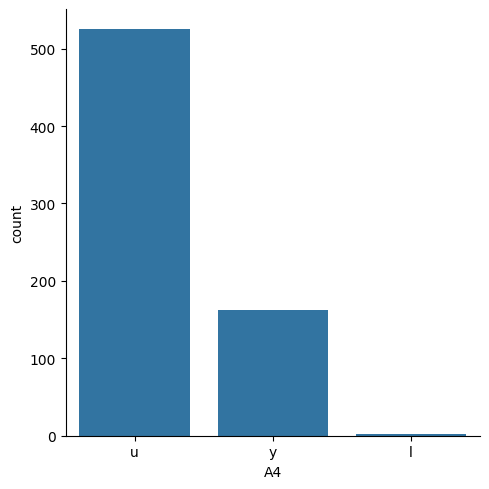

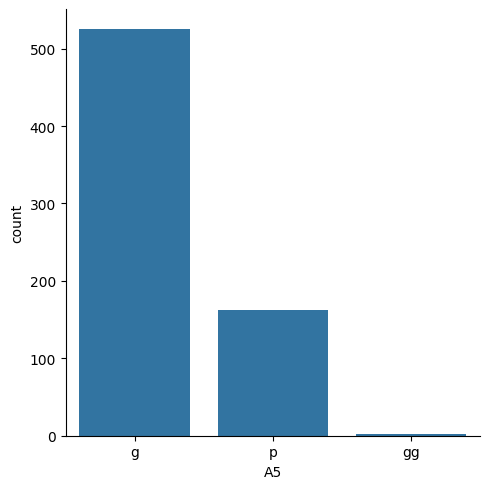

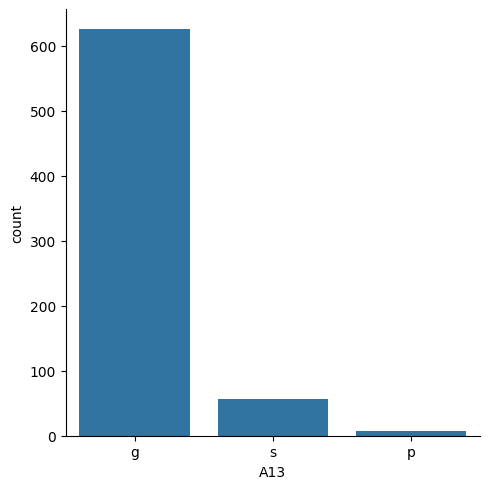

In [70]:
# replace the data with most frequent category
cat_columns = ['A4','A5','A13']
for i in range((len(cat_columns))):
 sns.catplot(data = data_clean, x = cat_columns[i], kind='count')

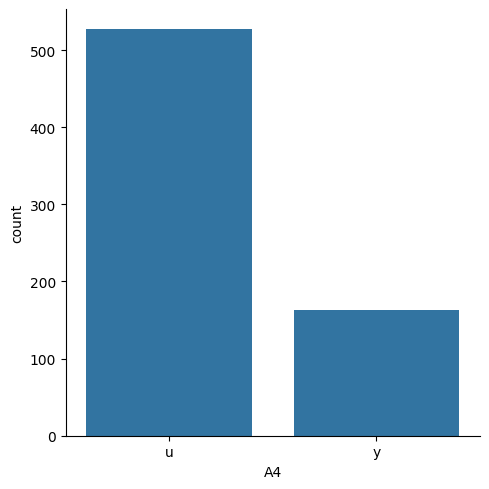

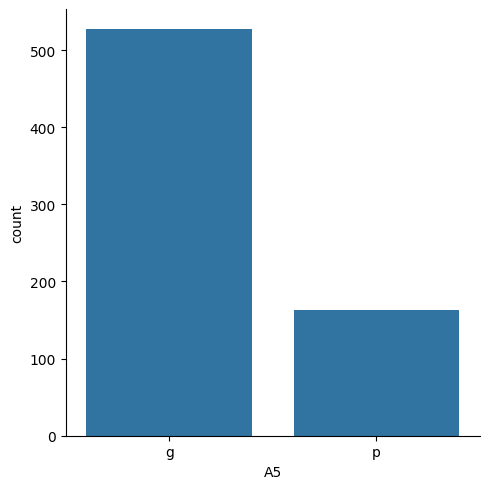

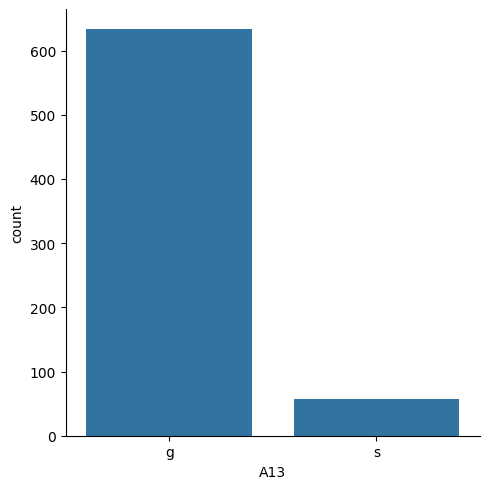

In [71]:
#step 5: replace the small values with np.nan
#step 6: impute the data with simpleimputer
#step 7: replace the new categorical columns into data_clean

data_clean['A4'] = data_clean['A4'].replace('l','u')
data_clean['A5'] = data_clean['A5'].replace('gg','g')
data_clean['A13'] = data_clean['A13'].replace('p','g')

for i in range((len(cat_columns))):
 sns.catplot(data = data_clean, x = cat_columns[i], kind='count')

Other than using the most frequent count, there are other methods that can be used to infer values to clean noisy data (and also fill in missing values), such as **Hot Deck Imputation**, modified **KNN imputation**, **Predictive model inference**, etc.

It is also a common issue encountered in real world datasets where **strings contain unnecessary characters, symbols or white spaces**. Such issues have vert large variety that we cannot manually list out all the texts to be replaced. So, for such data problems, Regular Expressions (identifying patterns in the text) is very useful for the cleaning.

`regex` is a parameter used in the `replace()` function that determines if the passed-in pattern is a regular expression. If True, it assumes the passed-in pattern is a regular expression and, if False, the function treats the pattern as a literal string.

Try the following test sample:

In [72]:
state = pd.Series(["\tJohor,Bahru\n\t", "Sela   ngor\n\t", " Sabah     ", "Sarawak`", "Penang", "123Kel3antan4", "Ke_dah", "Pahan?g"])
display(state)

0    \tJohor,Bahru\n\t
1      Sela   ngor\n\t
2           Sabah     
3             Sarawak`
4               Penang
5        123Kel3antan4
6               Ke_dah
7              Pahan?g
dtype: object

In [73]:
#remove unnecessary characters and spaces
state = state.replace("[^a-zA-Z]", "", regex=True)
display(state)

0    JohorBahru
1      Selangor
2         Sabah
3       Sarawak
4        Penang
5      Kelantan
6         Kedah
7        Pahang
dtype: object

In [74]:
# Regular Expressions (regex) is super useful in cleaning out strings.
state = state.replace("\s", "", regex=True) # remove all whitespace, works even if the whitespace is in the center of a string as opposed to state.str.strip()

# there are many ways we can clean this data using regex, since we know the state only consist of alphabets we can do:
state = state.replace("[^a-zA-Z]", "", regex=True).replace("JohorBahru", "Johor Bahru")

display(state)

0    Johor Bahru
1       Selangor
2          Sabah
3        Sarawak
4         Penang
5       Kelantan
6          Kedah
7         Pahang
dtype: object

## Intergrating datasets
Often in data science / data mining projects, sets of data may originate from various different sources. In order for efficient and effective extraction of knowledge, these sets need to be merged into a single unified set.

In the simplest case, datasets organized as relational tables can be intergrated easily in terms of column or rows. We can use `pandas.merge()` to do a join (inner, outer, left, right) by key (identified linking various tables) or simply use `pandas.concat()` to concatenate by row or column.

Reference for different type of joining:
* *Inner join*: return the common rows between the two tables
* *Outer join*: return the common rows between the two tables and the rows which are not matched
* *Left join*: returns all records from the left side and matched rows from the right table
* *Right join*: returns all rows from the right side and unmatched rows from the left table

Try the following dummy data for a quick test:

In [75]:
df1 = pd.DataFrame({'key': ['key_1', 'key_2', 'key_3'],
                   'B': np.random.random_sample(3)*1000})

df2 = pd.DataFrame({'key': ['key_1', 'key_2', 'key_3', 'key_4'],
                   'C': np.random.random_sample(4)*100})

display(df1)
display(df2)

,key,B
0,key_1,83.259477
1,key_2,613.350578
2,key_3,310.247992


,key,C
0,key_1,22.090748
1,key_2,98.374499
2,key_3,15.146983
3,key_4,18.407463


In [76]:
# Merging by key, try out the different merges using the 'how' parameter
df1.merge(df2, on="key", how="outer") # same concept as sql joins
display(df1)

,key,B
0,key_1,83.259477
1,key_2,613.350578
2,key_3,310.247992


In [77]:
#concat will simply add the data in
display(pd.concat([df1,df2], sort=True, axis=0)) # by row
display(pd.concat([df1,df2], sort=True, axis=1)) # by column

,B,C,key
0,83.259477,NaN,key_1
1,613.350578,NaN,key_2
2,310.247992,NaN,key_3
0,NaN,22.090748,key_1
1,NaN,98.374499,key_2
2,NaN,15.146983,key_3
3,NaN,18.407463,key_4


,key,B,key,C
0,key_1,83.259477,key_1,22.090748
1,key_2,613.350578,key_2,98.374499
2,key_3,310.247992,key_3,15.146983
3,NaN,NaN,key_4,18.407463


Notice the `NaN` cells created during the merging as the two sets of data may not have the exact match of rows and columns.

Next, try out the merging on the Big Mart Sales data used in the previous tutorial. Recall that one of the set is lacking one column. Consider what type of merging is appropriate for that set, and implement using code:

In [78]:
df_train = pd.read_csv(drive_path + "BigMartSales/train.csv")
df_test = pd.read_csv(drive_path + "BigMartSales/test.csv")
# Enter your code here
#EXERCISE !!!!!!!!!!!!


## Correlation Analysis

After cleaning and merging processes, there may / may not be some attributes that are closely related.

### Chi-squared Test (categorical data)

Firstly, let's try the **chi-squared test** from `scipy` package:

In [79]:
from scipy.stats import chi2_contingency

# create contingency table of the 2 attributes
ct_table_ind=pd.crosstab(data_clean['A1'],data_clean['A4'])
print('contingency_table :\n',ct_table_ind)

# compute the chi2 stat and get the value
c_stat, p, dof, expected = chi2_contingency(ct_table_ind)

print("Chi2 statistic: ", c_stat)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

contingency_table :
 A4    u    y
A1          
a   170   40
b   357  123
Chi2 statistic:  3.147754859414575
p value is 0.07603150857468634
Independent (H0 holds true)


Exercise: Compute the chi2 statistic for all pairs of the categorical attributes. Create a heatmap to visualize the relationships.

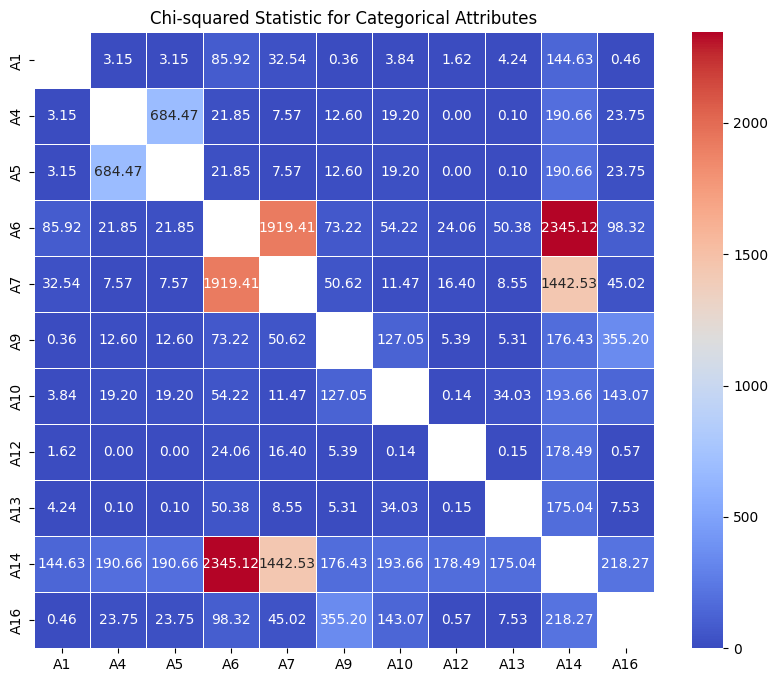

In [80]:
#Enter your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming 'data_clean' is your DataFrame

# Create a list of categorical columns
categorical_columns = data_clean.select_dtypes(include='object').columns.tolist()

# Create an empty DataFrame to store chi2 statistics
chi2_stats_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Loop through each pair of categorical columns and compute chi2 statistic
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            ct_table = pd.crosstab(data_clean[col1], data_clean[col2])
            c_stat, _, _, _ = chi2_contingency(ct_table)
            chi2_stats_df.at[col1, col2] = c_stat

# Convert the DataFrame to numeric values
chi2_stats_df = chi2_stats_df.apply(pd.to_numeric)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(chi2_stats_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Chi-squared Statistic for Categorical Attributes')
plt.show()



### Covariance (Numerical)

We can find relationships of numerical data using covariance:

,A2,A3,A8,A11,A15
A2,140.805953,11.969522,15.802429,10.667550,1.120637e+03
A3,11.969522,24.782109,4.979547,6.565511,3.193361e+03
A8,15.802429,4.979547,11.199152,5.245559,8.952336e+02
A11,10.667550,6.565511,5.245559,23.648186,1.613738e+03
A15,1120.637306,3193.361494,895.233649,1613.738171,2.714517e+07


<AxesSubplot: >

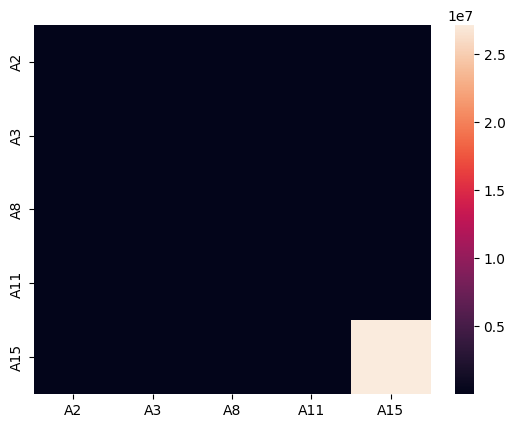

In [81]:
cov_mat = data_clean.cov(numeric_only=True)
display(cov_mat)
sns.heatmap(cov_mat)

Notice the covariance values are significantly different for the different attributes, which may be misleading when assessing relationships of attributes with different ranges in their units.

### Correlation Coefficient
Lastly, let's try the correlation coefficient for these numerical values:

<AxesSubplot: >

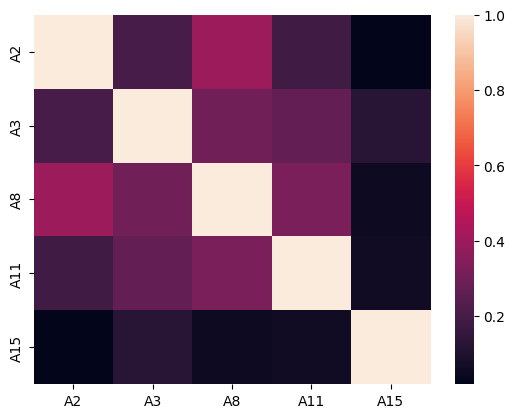

In [82]:
corr_matrix  = data_clean.corr(numeric_only = True)
sns.heatmap(corr_matrix)

Notice the more meaningful heatmap showing the relationship of the numerical attributes due to the normalization. There are various methods of correlation provided by pandas which can be selected using the `methods` parameter. Explore the documentation for the options.

Lastly, based on the various relationship analysis, what can be concluded from the Credit Approval dataset attributes? Write down your observations: